In [201]:
import sys
sys.path.append('C:\Anaconda3\Lib\site-packages')

import warnings
warnings.filterwarnings('ignore')

import requests
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
# sns.reset_orig()

import pandas as pd
import numpy as np
import scipy as sp
import scipy.io

### Getting top functions from Robert Kozikowski's blog post (July 2016)
For more information on how these were determined you can check out the post where he details the SQL query used to pull the data.

In [3]:
url = requests.get('https://kozikow.com/2016/07/01/top-pandas-functions-used-in-github-repos/#Top-numpy-functions-and-modules')
soup = BeautifulSoup(url.text, 'html.parser')

In [4]:
tablehtml = soup.find_all('tr')

In [5]:
# e.g.
tablehtml[68].text.split()

['stats',
 '2281',
 '5717',
 'https://github.com/geophysics/mtpy/blob/master/mtpy/modeling/occam2d.py']

In [6]:
top_func_pd, counts_distinct_pd, counts_total_pd = [], [], []
for i in range(20):
    start = 1
    x = tablehtml[start+i].text.split()
    top_func_pd.append(x[0])
    counts_distinct_pd.append(int(x[1]))
    counts_total_pd.append(int(x[2]))
    
top_func_pd_df, counts_distinct_pd_df = [], []
for i in range(20):
    start = 23
    x = tablehtml[start+i].text.split()
    top_func_pd_df.append(x[0])
    counts_distinct_pd_df.append(int(x[1]))
    
top_func_np, counts_distinct_np, counts_total_np = [], [], []
for i in range(20):
    start = 46
    x = tablehtml[start+i].text.split()
    top_func_np.append(x[0])
    counts_distinct_np.append(int(x[1]))
    counts_total_np.append(int(x[2]))
    
top_func_sp, counts_distinct_sp, counts_total_sp = [], [], []
for i in range(20):
    start = 68
    x = tablehtml[start+i].text.split()
    top_func_sp.append(x[0])
    counts_distinct_sp.append(int(x[1]))
    counts_total_sp.append(int(x[2]))

## Most popular `pandas`, `pandas.DataFrame`, `numpy`, and `scipy` functions on Github
The functions in each case (as seen in the figures below) are ordered by the number of unique repositories containing instances. For example we see that `pd.Timestamp` is not as often used in a project as a number of others, but if used once its likely to be found many times in the project code.

### Top 10 `Pandas` functions

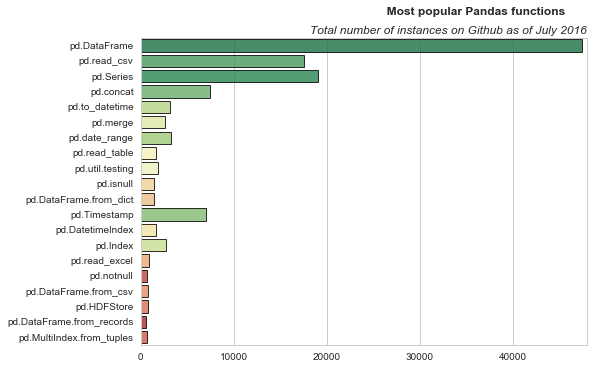

In [8]:
# Order according to the total number of instances
tups = sorted(list(zip(counts_total_pd, counts_distinct_pd)),
              key=lambda x: x[0])[::-1]
# Add indices
tups = list(zip([item[0] for item in tups],
                 [item[1] for item in tups],
                 np.arange(0,20,1)))
# Re-order according to number of repositories
order = [item[2] for item in sorted(tups, key=lambda x: x[1])[::-1]]
colors = sns.color_palette('RdYlGn', 20)[::-1]
colors = np.array(colors)[order]

labels = ['pd.'+label for label in top_func_pd]
sns.barplot(x=counts_total_pd, y=labels, palette=colors, alpha=0.8, lw=1)
plt.suptitle('                                                                       Most popular Pandas functions', weight='bold')
plt.title('                                                  Total number of instances on Github as of July 2016', style='italic')
plt.xlim(0,48000)
plt.savefig('popular_pandas_functions.png', bbox_inches='tight', dpi=144)
plt.show()

**1) `DataFrame`**   
Creates a dataframe object.

In [9]:
df = pd.DataFrame(data={'y': [1, 2, 3],
                       'score': [93.5, 89.4, 90.3],
                       'name': ['Dirac', 'Pauli', 'Bohr'],
                       'birthday': ['1902-08-08', '1900-04-25', '1885-10-07']})
print(type(df))
print(df.dtypes)
df

<class 'pandas.core.frame.DataFrame'>
birthday     object
name         object
score       float64
y             int64
dtype: object


,birthday,name,score,y
0,1902-08-08,Dirac,93.5,1
1,1900-04-25,Pauli,89.4,2
2,1885-10-07,Bohr,90.3,3


**2) `read_csv`**   
Creates a dataframe object from .csv file.

In [ ]:
df = pd.read_csv(filepath_or_buffer='file_name.csv')

**3) `Series`**  
Creates a series object. A series is also returned if accesing a single dataframe column
i.e., `df.col_name`

In [11]:
items = pd.Series(data=[93.5, 89.4, 90.3], name='score')
print(type(items))
items

<class 'pandas.core.series.Series'>


0    93.5
1    89.4
2    90.3
Name: score, dtype: float64

**4) `concat`**   
Merge Series, DataFrame, or Panel objects.

In [12]:
items2 = pd.Series(data=['1902-08-08', '1900-04-25'], name='birthday')

print('merged items along index axes:')
print(pd.concat(objs=[items, items2], axis=0))
print('')
print('merged items along column axes:')
print(pd.concat(objs=[items, items2], axis=1))

merged items along index axes:
0          93.5
1          89.4
2          90.3
0    1902-08-08
1    1900-04-25
dtype: object

merged items along column axes:
   score    birthday
0   93.5  1902-08-08
1   89.4  1900-04-25
2   90.3         NaN


**5) `to_datetime`**   
Convert argument to datetime.

In [13]:
pd.to_datetime(arg=df.birthday, format='%Y-%m-%d')

0   1902-08-08
1   1900-04-25
2   1885-10-07
Name: birthday, dtype: datetime64[ns]

**6) `merge`**   
Combine dataframes.
 - `how`='outer' -> insert NaNs if need be
 - `how`='inner' -> remove rows containing NaN

In [14]:
df_new = pd.DataFrame(data=list(zip(['Dirac', 'Pauli', 'Bohr', 'Einstein'],
                                    [True, False, True, True])),
                      columns=['name', 'friendly'])

df_merge = pd.merge(left=df, right=df_new, on='name', how='outer')
df_merge

,birthday,name,score,y,friendly
0,1902-08-08,Dirac,93.5,1.0,True
1,1900-04-25,Pauli,89.4,2.0,False
2,1885-10-07,Bohr,90.3,3.0,True
3,NaN,Einstein,NaN,NaN,True


**7) `date_range`**   
Generates a set of datetimes with given period or frequency (as seen here).
 - freq='M' -> monthly
 - can set freq to e.g., 'D', '7H', etc

In [15]:
pd.date_range(start=df.birthday[2], end=df.birthday[0],
              freq='M')

DatetimeIndex(['1885-10-31', '1885-11-30', '1885-12-31', '1886-01-31',
               '1886-02-28', '1886-03-31', '1886-04-30', '1886-05-31',
               '1886-06-30', '1886-07-31',
               ...
               '1901-10-31', '1901-11-30', '1901-12-31', '1902-01-31',
               '1902-02-28', '1902-03-31', '1902-04-30', '1902-05-31',
               '1902-06-30', '1902-07-31'],
              dtype='datetime64[ns]', length=202, freq='M')

**8) read_table**   
Read in a general delimited file into dataframe. Takes in parameter `sep` e.g., 
 - tab separated -> `sep`=' '
 - dash separated -> `sep`='-'   

It can also be left blank and automatically set.

In [ ]:
df = pd.read_table(filepath_or_buffer='data.file')

**9) `util.testing`**   
There is a whole lot of functions inside this module. A one seems to be `pd.util.testing.assert_frame_equal`. It will raise an Error (stopping the script) and print the percentage difference between the dataframes.

In [16]:
dfa = pd.DataFrame({'a': [1.0, 2.0],
                    'b': ['apple', 'cat']})

dfb = pd.DataFrame({'a': [1.0, 2.0],
                    'b': ['apple', 'dog']})

pd.util.testing.assert_frame_equal(dfa, dfb)

AssertionError: DataFrame.iloc[:, 1] are different

DataFrame.iloc[:, 1] values are different (50.0 %)
[left]:  [apple, cat]
[right]: [apple, dog]

**10) `isnull` **   
Returns a True/False mask the same shape as the input array. Obviously, the same applies to dataframes.

In [17]:
test_list = [[None, 1, 2, 3, 4], [None, 1, None, 3, None]]
print(pd.isnull(test_list))

pd.isnull(df_merge)

[[ True False False False False]
 [ True False  True False  True]]


,birthday,name,score,y,friendly
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,True,False,True,True,False


**Plot of most popular `pd.DataFrame` functions**

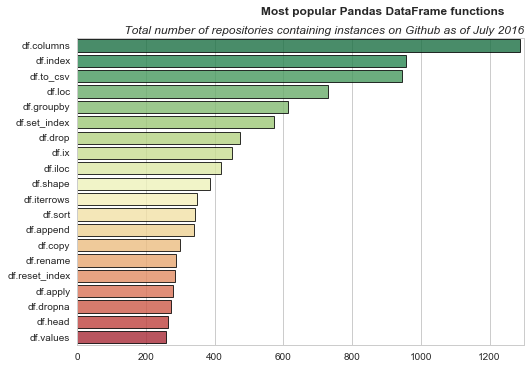

In [18]:
labels = ['df.'+label for label in top_func_pd_df]
sns.barplot(x=counts_distinct_pd_df, y=labels, palette=sns.color_palette('RdYlGn', 20)[::-1], alpha=0.8, lw=1)
plt.suptitle('                                                     Most popular Pandas DataFrame functions', weight='bold')
plt.title('              Total number of repositories containing instances on Github as of July 2016', style='italic')
plt.xlim(0,1300)
plt.savefig('popular_pandas_df_functions.png', bbox_inches='tight', dpi=144)
plt.show()

### Top 10 `Numpy` functions

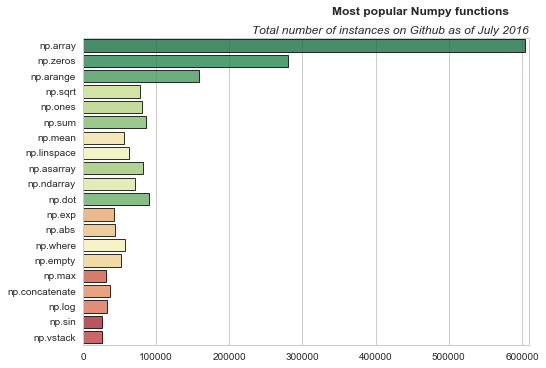

In [19]:
# Order according to the total number of instances
tups = sorted(list(zip(counts_total_np, counts_distinct_np)),
              key=lambda x: x[0])[::-1]
# Add indices
tups = list(zip([item[0] for item in tups],
                 [item[1] for item in tups],
                 np.arange(0,20,1)))
# Re-order according to number of repositories
order = [item[2] for item in sorted(tups, key=lambda x: x[1])[::-1]]
colors = sns.color_palette('RdYlGn', 20)[::-1]
colors = np.array(colors)[order]

labels = ['np.'+label for label in top_func_np]
sns.barplot(x=counts_total_np, y=labels, palette=colors, alpha=0.8, lw=1)
plt.suptitle('                                                                        Most popular Numpy functions', weight='bold')
plt.title('                                                  Total number of instances on Github as of July 2016', style='italic')
plt.xlim(0,610000)
plt.savefig('popular_numpy_functions.png', bbox_inches='tight', dpi=144)
plt.show()

**1) `array`**   
Converts list to numpy array object. Numpy arrays have many attractive features such as the ability to select subsets using masks and the datatype can be specified.

In [20]:
np.array(object=[[1, 9, 9, 1], [2, 0, 1, 6]], dtype=np.float32)

array([[ 1.,  9.,  9.,  1.],
       [ 2.,  0.,  1.,  6.]], dtype=float32)

**2) `zeros`**  
Create numpy array of zeros (integer or float).

In [21]:
np.zeros(shape=(2, 4), dtype=int)

array([[0, 0, 0, 0],
       [0, 0, 0, 0]])

**3) `arange`**  
Create an array of evenly spaced values.

In [22]:
np.arange(start=1.5, stop=8.5, step=0.7, dtype=float)

array([ 1.5,  2.2,  2.9,  3.6,  4.3,  5. ,  5.7,  6.4,  7.1,  7.8])

**4) `sqrt`**  
Takes the square root of input.

In [23]:
np.sqrt([16, 9, 4])

array([ 4.,  3.,  2.])

**5) `ones`**  
Create numpy array of ones.

In [24]:
np.ones(shape=(2, 3, 1), dtype=np.unicode)

array([[['1'],
        ['1'],
        ['1']],

       [['1'],
        ['1'],
        ['1']]], 
      dtype='<U1')

**7) `sum`**  
Get sum of values along rows or columns.

In [25]:
vals = np.arange(0, 12, 1).reshape((3, 4))
print(vals)
print('')
print('sum entire array =', np.sum(vals))
print('sum along columns =', np.sum(vals, axis=0))
print('sum along rows =', np.sum(vals, axis=1))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

sum entire array = 66
sum along columns = [12 15 18 21]
sum along rows = [ 6 22 38]


**8) `mean`**

In [26]:
vals = np.array([1, 2, 3, 4]*3).reshape((3, 4))
print(vals)
print('')
print('mean entire array =', np.mean(vals))
print('mean along columns =', np.mean(vals, axis=0))
print('mean along rows =', np.mean(vals, axis=1))

[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]

mean entire array = 2.5
mean along columns = [ 1.  2.  3.  4.]
mean along rows = [ 2.5  2.5  2.5]


**9) `linspace`**  
Create an array of evenly spaced values of defined length.

In [27]:
np.linspace(0, 19.3, 6)

array([  0.  ,   3.86,   7.72,  11.58,  15.44,  19.3 ])

**10) `asarray`**  
Convert to numpy array. If input is already a `ndarray` then it will not be copied. The same result can be achieved with `array` by setting `copy=False`.

In [28]:
vals = np.array([9, 2, 3, 5])
print(type(vals))
print(vals)
a = np.asarray(vals)
a += 1
print(vals) # vals changes because it was not copied when assigning 'a'

<class 'numpy.ndarray'>
[9 2 3 5]
[10  3  4  6]


### Top 10 `Scipy` functions

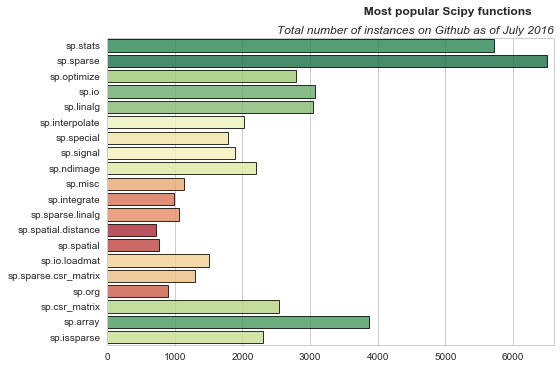

In [29]:
# Order according to the total number of instances
tups = sorted(list(zip(counts_total_sp, counts_distinct_sp)),
              key=lambda x: x[0])[::-1]
# Add indices
tups = list(zip([item[0] for item in tups],
                 [item[1] for item in tups],
                 np.arange(0,20,1)))
# Re-order according to number of repositories
order = [item[2] for item in sorted(tups, key=lambda x: x[1])[::-1]]
colors = sns.color_palette('RdYlGn', 20)[::-1]
colors = np.array(colors)[order]

labels = ['sp.'+label for label in top_func_sp]
sns.barplot(x=counts_total_sp, y=labels, palette=colors, alpha=0.8, lw=1)
plt.suptitle('                                                                          Most popular Scipy functions', weight='bold')
plt.title('                                                  Total number of instances on Github as of July 2016', style='italic')
plt.xlim(0,6600)
plt.savefig('popular_scipy_functions.png', bbox_inches='tight', dpi=144)
plt.show()

**1) `stats`**  
A module containing statistical functions and a bunch of distributions (continuous and discrete).

In [30]:
# Getting standard deviation & ignoring NaNs

vals = [0.0, np.nan, 8.3, 2.4, np.nan, 3.2]
sp.nanstd(vals)

3.0243801017729237

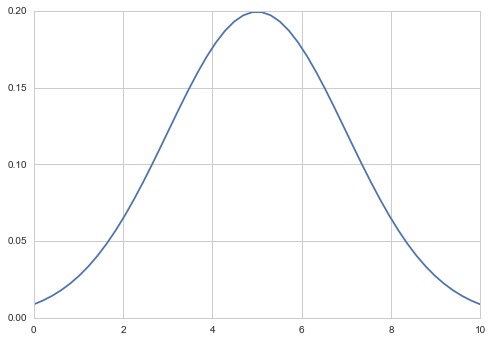

In [158]:
# Normal distribution

x = np.linspace(0,10,50)
# plot Gaussian
plt.plot(x, sp.stats.norm.pdf(x=x, loc=5, scale=2))
# randomly sample Gaussian
sp.stats.norm.rvs(loc=5, scale=2, size=4)
plt.show()

**2) `sparse`**  
A module containing functions for creating and working with sparse matrix objects. There are many different matrix types, we'll use `csr` (Compressed Sparse Row format) for the examples below.

In [32]:
vals = np.array([[0, 3.4, 2], [0, 9.9, 0], [0, 0, -5.4]])
print(vals)
print('')
a = sp.sparse.csr_matrix(vals)
print(type(a))
print('non-zero entries =', a.data)
print('diagonal entries =',a.diagonal())
print('upper triangular =\n',sp.sparse.triu(a))

[[ 0.   3.4  2. ]
 [ 0.   9.9  0. ]
 [ 0.   0.  -5.4]]

<class 'scipy.sparse.csr.csr_matrix'>
non-zero entries = [ 3.4  2.   9.9 -5.4]
diagonal entries = [ 0.   9.9 -5.4]
upper triangular =
   (0, 1)	3.4
  (0, 2)	2.0
  (1, 1)	9.9
  (2, 2)	-5.4


**3) `optimize`**  
A module containing optimization and root finding tools.

In [33]:
# Find roots of a quadratic function

f = lambda x: x**2 - 3*x + 2 # = (x-1)*(x-2)
print(f)
roots = (sp.optimize.brentq(f=f, a=0, b=1.5),
         sp.optimize.brentq(f=f, a=1.5, b=5))
print('First root =', roots[0])
print('Second root =', roots[1])

<function <lambda> at 0x00000181CCEEC598>
First root = 1.0000000000000002
Second root = 1.9999999999999998


optimal parameters = [ 0.6 -2.2  0.4]


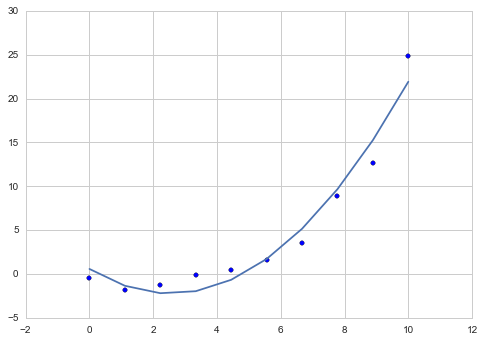

In [157]:
# Least square parameter optimization

x = np.linspace(0, 10, 10)
y = np.array([-0.5, -1.8, -1.3, -0.1, 0.4,
              1.6, 3.5, 8.9, 12.6, 24.8])

# Quadratic functional form to fit
f = lambda beta, x:  beta[0] + beta[1]*x + beta[2]*x**2

# Differences between f and actual values
error_function = lambda beta, x, y: f(beta, x) - y

# Initial guess for parameters
beta_0 = (0.0, 0.0, 0.0)

beta, _ = sp.optimize.leastsq(func=error_function, x0=beta_0, args=(x, y))
print('optimal parameters =', beta)
plt.scatter(x, y); plt.plot(x, [f(beta, xx) for xx in x])
plt.show()

**4) `io`**  
This module is not automatically loaded with scipy (must import scipy.io). It contains tools for reading and writing data to a variety of formats.

In [35]:
# Passing numpy array to matlab

# Set up initial array
np.set_printoptions(precision=1)
matrix = np.random.random(size=(8, 6))
print(matrix)

# Create dictionary of rows
data_dict = {'row'+str(r_id): row for r_id, row in
             zip(range(len(matrix)), matrix)}
# Write to matlab file where each row will be a variable
scipy.io.savemat('random_array.mat', mdict=data_dict, oned_as='row')

# Read in the data we just saved
loaded_data_dict = scipy.io.loadmat('random_array.mat')
loaded_data_dict

[[ 0.8  0.1  0.7  0.6  0.1  0.9]
 [ 0.2  0.1  0.1  0.7  0.8  1. ]
 [ 0.8  0.5  0.1  0.4  0.8  0.2]
 [ 0.4  0.3  0.5  0.3  0.   0.9]
 [ 0.7  0.7  0.9  0.8  0.5  0.2]
 [ 0.   0.9  0.1  1.   1.   0.7]
 [ 0.1  0.3  0.1  1.   0.8  0.8]
 [ 0.5  0.4  0.3  0.7  0.7  0.4]]


{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Wed Aug 10 10:38:53 2016',
 '__version__': '1.0',
 'row0': array([[ 0.8,  0.1,  0.7,  0.6,  0.1,  0.9]]),
 'row1': array([[ 0.2,  0.1,  0.1,  0.7,  0.8,  1. ]]),
 'row2': array([[ 0.8,  0.5,  0.1,  0.4,  0.8,  0.2]]),
 'row3': array([[ 0.4,  0.3,  0.5,  0.3,  0. ,  0.9]]),
 'row4': array([[ 0.7,  0.7,  0.9,  0.8,  0.5,  0.2]]),
 'row5': array([[ 0. ,  0.9,  0.1,  1. ,  1. ,  0.7]]),
 'row6': array([[ 0.1,  0.3,  0.1,  1. ,  0.8,  0.8]]),
 'row7': array([[ 0.5,  0.4,  0.3,  0.7,  0.7,  0.4]])}

**5) `linalg`**  
Among other things, this module contains linear algebra functions including inverse (`inv`), determinant (`det`), and matrix/vector norm (`norm`) along with eigenvalue tools e.g., `eig`.

In [36]:
matrix = np.array([[4.3, 8.9],[2.2, 3.4]])
print(matrix)
print('')

# Find norm
norm = sp.linalg.norm(matrix)
print('norm =', norm)
# Alternate method
print(norm == np.square([v for row in matrix for v in row]).sum()**(0.5))
print('')

# Get eigenvalues and eigenvectors
eigvals, eigvecs = sp.linalg.eig(matrix)
print('eigenvalues =', eigvals)
print('eigenvectors =\n', eigvecs)

[[ 4.3  8.9]
 [ 2.2  3.4]]

norm = 10.6817601546
True

eigenvalues = [ 8.3+0.j -0.6+0.j]
eigenvectors =
 [[ 0.9 -0.9]
 [ 0.4  0.5]]


**6) `interpolate`**   
A module containing splines and other interpolation tools.

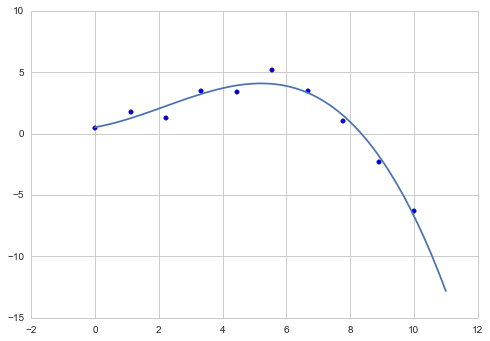

In [156]:
# Spline fit for scattered points

x = np.linspace(0, 10, 10)
xs = np.linspace(0, 11, 50)
y = np.array([0.5, 1.8, 1.3, 3.5, 3.4,
              5.2, 3.5, 1.0, -2.3, -6.3])
spline = sp.interpolate.UnivariateSpline(x, y)
plt.scatter(x, y); plt.plot(xs, spline(xs))
plt.show()

__7) `special`__   
A module containing mathematical functions (e.g. Bessel functions, gamma functions, legandre polynomials & spherical harmonics, ...)

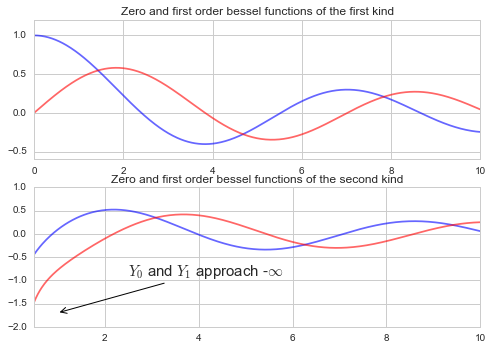

In [73]:
x = np.linspace(0,10,500)
fix, ax = plt.subplots(2)

ax[0].set_title('Zero and first order bessel functions of the first kind')
ax[0].plot(x, sp.special.j0(x), c='blue', alpha=0.6)
ax[0].plot(x, sp.special.j1(x), c='red', alpha=0.6)

ax[1].set_title('Zero and first order bessel functions of the second kind')
ax[1].plot(x, sp.special.y0(x), c='blue', alpha=0.6)
ax[1].plot(x, sp.special.y1(x), c='red', alpha=0.6)
ax[1].set_ylim(-2,1); ax[1].set_xlim(0.5,10)
ax[1].annotate('$Y_0$ and $Y_1$ approach -$\infty$', xy=(1,-1.7), xytext=(2.5, -0.9),
               arrowprops=dict(arrowstyle='->', lw=1), fontsize=15)

plt.show()

__8) `signal`__  
This module must be import directly. It contains tools for signal processing.

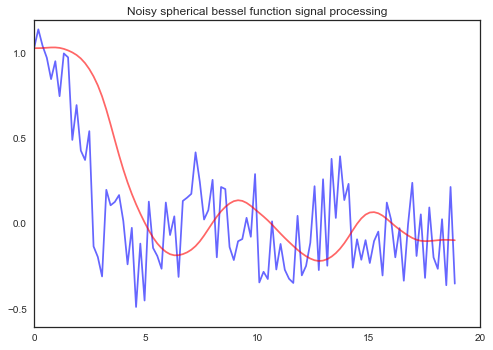

In [179]:
# A modified example posted in the docs:
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html#scipy.signal.lfilter

import scipy.signal
np.random.seed(0)

x = np.linspace(0,6*np.pi,100)
y = [sp.special.sph_jn(n=3, z=xi)[0][0] for xi in x]
y = [yi + (np.random.random()-0.5)*0.7 for yi in y]
# y = np.sin(x)

# Get paramters for an order 3 lowpass butterworth filter
b, a = sp.signal.butter(3, 0.08)

# Initialize filter
zi = sp.signal.lfilter_zi(b, a)

# Apply filter
y_smooth, _ = sp.signal.lfilter(b, a, y, zi=zi*y[0])

plt.plot(x, y, c='blue', alpha=0.6)
plt.plot(x, y_smooth, c='red', alpha=0.6)
plt.title('Noisy spherical bessel function signal processing')
plt.savefig('noisy_signal_fit.png', bbox_inches='tight')
plt.show()

__9) `ndimage`__  
A module cointainig image processing tools e.g., `ndimage.filters.gaussian_filter`, `ndimage.interpolation.rotate`, etc...

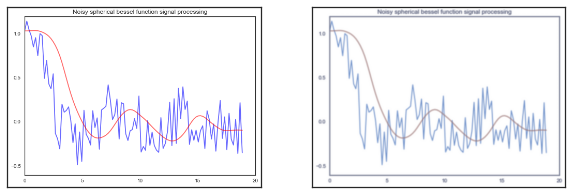

In [194]:
# Blurring an image

# Load an image
figure = plt.imread('noisy_signal_fit.png')

# Blur the image
figure_blur = sp.ndimage.filters.gaussian_filter(figure, sigma=1)

# Plot them
pics = [figure, figure_blur]
sns.set_style('white')
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
for pic, ax in zip(pics, axes):
    ax.imshow(pic); ax.set_xticks([]); ax.set_yticks([])

__10) `misc`__  
A module containing _"utilities that don't have another home"_. Based on the google search results, people often use `misc.imread` and `mics.imsave` to open and save pictures.

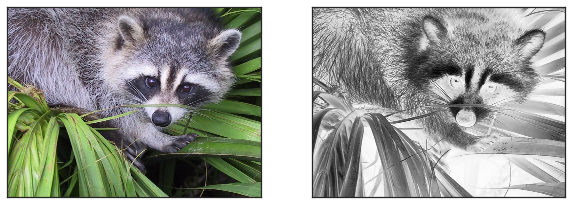

In [200]:
# Get a raccoon face

# Get the raccoon
pics = sp.misc.face(), sp.misc.face(gray=True)

# Look at it
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
for pic, ax in zip(pics, axes):
    ax.imshow(pic); ax.set_xticks([]); ax.set_yticks([])
plt.show()